In [52]:
# BRFSS

# Importing libraries
import pandas as pd
import numpy as np

import time

In [53]:
# Reading CSV, creating data frame and testing it out
df = pd.read_csv('brfss_for_bda_2021.csv', skipinitialspace = True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (183,378) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
#df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

df.drop(df.columns.difference(['SMOKDAY2','MARITAL','GENHLTH', 'SEX', 'AGE']), 1, inplace=True)
df

,GENHLTH,SEX,AGE,MARITAL,SMOKDAY2
0,Very good,Male,Age 25 - 34,Never married,Not asked or Missing
1,Good,Female,Age 45 - 54,Separated,Not asked or Missing
2,Very good,Female,Age 25 - 34,Never married,Not asked or Missing
3,Excellent,Male,Age 18 - 24,Never married,Not asked or Missing
4,Excellent,Female,Age 25 - 34,Never married,Not asked or Missing
...,...,...,...,...,...
12333,Good,Male,Age 18 - 24,Never married,Every day
12334,Good,Female,Age 65 or older,Married,Not asked or Missing
12335,Excellent,Male,Age 55 - 64,A member of an unmarried couple,Not asked or Missing
12336,Good,Female,Age 25 - 34,A member of an unmarried couple,Not asked or Missing


In [31]:
# Breakdown of column
df['AGE'].value_counts()

Age 65 or older        4031
Age 55 - 64            2559
Age 45 - 54            2150
Age 35 - 44            1471
Age 25 - 34            1273
Age 18 - 24             657
Refused                 186
Don't know/Not sure      11
Name: AGE, dtype: int64

In [39]:
# Cleaning GENHLTH
valid_set = set(["Don't know/Not Sure", "Refused"])
df.loc[df.GENHLTH.isin(valid_set), 'GENHLTH'] = np.NaN

# Check that cleaned properly
df['GENHLTH'].value_counts()

Very good    4063
Good         3838
Excellent    2236
Fair         1536
Poor          600
Name: GENHLTH, dtype: int64

In [27]:
# Cleaning SMOKDAY2
valid_set = set(["Not asked or Missing", "Refused", "Don´t Know/Not Sure"])
df.loc[df.SMOKDAY2.isin(valid_set), 'SMOKDAY2'] = np.NaN

# Check that cleaned properly
df['SMOKDAY2'].value_counts()

Not at all    3472
Every day     1075
Some days      495
Name: SMOKDAY2, dtype: int64

In [30]:
# Cleaning MARITAL
valid_set = set(["Refused"])
df.loc[df.MARITAL.isin(valid_set), 'MARITAL'] = np.NaN

# Check that cleaned properly
df['MARITAL'].value_counts()

Married                            5742
Never married                      2538
Divorced                           1567
Widowed                            1505
Separated                           424
A member of an unmarried couple     408
Name: MARITAL, dtype: int64

In [33]:
# Cleaning AGE
valid_set = set(["Age 45 - 54", "Age 35 - 44"])
df.loc[~df.AGE.isin(valid_set), 'AGE'] = np.NaN

# Check that cleaned properly
df['AGE'].value_counts()

Age 45 - 54    2150
Age 35 - 44    1471
Name: AGE, dtype: int64

In [36]:
df.to_csv('RQ1 Cleaned.csv', index = False)

In [7]:
# Breakdown of column
df['INCOME2'].value_counts()



$75,000 or more                                     3715
Less than $75,000 ($50,000 to less than $75,000)    1557
Less than $50,000 ($35,000 to less than $50,000)    1226
Refused                                             1062
Less than $35,000 ($25,000 to less than $35,000)    1009
Less than $25,000 ($20,000 to less than $25,000)     870
Less than $20,000 ($15,000 to less than $20,000)     842
Don't know/Not sure                                  755
Less than $10,000                                    575
Less than $15,000 ($10,000 to less than $15,000)     547
Not asked or Missing                                 180
Name: INCOME2, dtype: int64

In [38]:
# Replace by mapping in column SMOKDAY2
mapping = {'Not at all': 0,
           'Every day': 1,
           'Some days': 1}
df.SMOKDAY2 = df.SMOKDAY2.map(mapping)

df['SMOKDAY2'].value_counts()

0.0    3472
1.0    1570
Name: SMOKDAY2, dtype: int64

In [43]:
# Replace by mapping in column GENHLTH
mapping = {'Poor': 0,
           'Fair': 1,
           'Excellent': 2,
           'Good': 3,
           'Very good': 4}
df.GENHLTH = df.GENHLTH.map(mapping)

df['GENHLTH'].value_counts()

4.0    4063
3.0    3838
2.0    2236
1.0    1536
0.0     600
Name: GENHLTH, dtype: int64

In [44]:
# Replace by mapping in column MARITAL
mapping = {'Married': 0,
           'Never married': 1,
           'Divorced': 2,
           'Widowed': 3,
           'Separated': 4,
           'A member of an unmarried couple': 5}
df.MARITAL = df.MARITAL.map(mapping)

#Married                            5742
#Never married                      2538
#Divorced                           1567
#Widowed                            1505
#Separated                           424
#A member of an unmarried couple     408

df['MARITAL'].value_counts()

0.0    5742
1.0    2538
2.0    1567
3.0    1505
4.0     424
5.0     408
Name: MARITAL, dtype: int64

In [46]:
# Filter and delete by age
df = df.loc[df['AGE'].isin(['Age 45 - 54', 'Age 35 - 44'])]

df

,GENHLTH,SEX,AGE,MARITAL,SMOKDAY2
1,3.0,Female,Age 45 - 54,4.0,NaN
5,3.0,Female,Age 35 - 44,1.0,1.0
7,4.0,Male,Age 35 - 44,2.0,1.0
8,3.0,Male,Age 35 - 44,0.0,NaN
14,2.0,Male,Age 35 - 44,0.0,NaN
...,...,...,...,...,...
12319,2.0,Female,Age 35 - 44,0.0,NaN
12321,3.0,Male,Age 35 - 44,0.0,0.0
12326,3.0,Male,Age 35 - 44,NaN,NaN
12330,2.0,Male,Age 35 - 44,0.0,0.0


In [47]:
# Filter and delete by sex
df = df.loc[df['SEX'].isin(['Male'])]

df

,GENHLTH,SEX,AGE,MARITAL,SMOKDAY2
7,4.0,Male,Age 35 - 44,2.0,1.0
8,3.0,Male,Age 35 - 44,0.0,NaN
14,2.0,Male,Age 35 - 44,0.0,NaN
31,4.0,Male,Age 35 - 44,5.0,0.0
37,4.0,Male,Age 35 - 44,0.0,NaN
...,...,...,...,...,...
12309,4.0,Male,Age 35 - 44,2.0,NaN
12315,1.0,Male,Age 35 - 44,0.0,NaN
12321,3.0,Male,Age 35 - 44,0.0,0.0
12326,3.0,Male,Age 35 - 44,NaN,NaN


In [50]:
df.drop(['SEX'], axis=1, inplace=True)
df.drop(['AGE'], axis=1, inplace=True)

df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GENHLTH,MARITAL,SMOKDAY2
7,4.0,2.0,1.0
8,3.0,0.0,NaN
14,2.0,0.0,NaN
31,4.0,5.0,0.0
37,4.0,0.0,NaN
...,...,...,...
12309,4.0,2.0,NaN
12315,1.0,0.0,NaN
12321,3.0,0.0,0.0
12326,3.0,NaN,NaN


In [51]:
df.to_csv('RQ1 Cleaned Numbers.csv', index = False)

In [10]:
# Breakdown of column
df['BLIND'].value_counts()

No                      11273
Yes                       543
Not asked or Missing      477
Refused                    24
Don't know/Not Sure        21
Name: BLIND, dtype: int64

In [11]:
valid_set = set(["Don't know/Not Sure", "Refused","Not asked or Missing"])
df.loc[df.BLIND.isin(valid_set), 'BLIND'] = np.NaN

df['BLIND'].value_counts()

No     11273
Yes      543
Name: BLIND, dtype: int64

In [12]:
df = df.loc[df['VETERAN3'].isin(['Yes'])]


In [13]:
df

,VETERAN3,INCOME2,BLIND
0,Yes,8.0,No
7,Yes,7.0,No
16,Yes,6.0,No
35,Yes,5.0,No
37,Yes,NaN,NaN
...,...,...,...
12288,Yes,NaN,No
12298,Yes,8.0,No
12325,Yes,4.0,No
12328,Yes,4.0,No


In [14]:
df_blind = df.loc[df['BLIND'].isin(['Yes'])]
df_not_blind = df.loc[df['BLIND'].isin(['No'])]


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

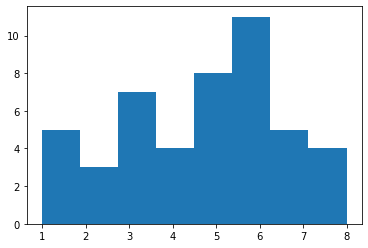

(array([ 17.,  36.,  57.,  88., 126., 156., 204., 327.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <BarContainer object of 8 artists>)

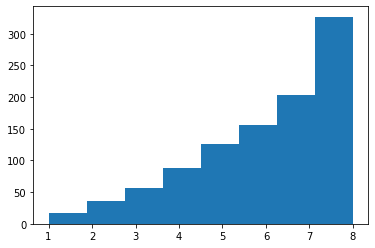

In [48]:
plt.hist(x = df_blind.INCOME2, bins = 8)
plt.show()
plt.hist(x = df_not_blind.INCOME2, bins = 8)

In [34]:
df_blind.INCOME2.mean() #25 - 35

df_blind.INCOME2.mode()[0] #25 - 35

6.0

In [40]:
df_blind.INCOME2.value_counts().index.tolist()

[6.0, 5.0, 3.0, 7.0, 1.0, 4.0, 8.0, 2.0]

Text(0.5, 0, 'Not Blind Income')

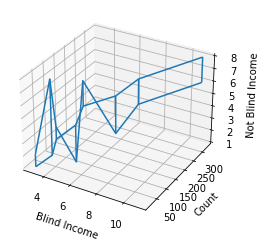

In [42]:
#plt.plot(df_blind.INCOME2.value_counts(),df_not_blind.INCOME2.value_counts())

from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()
axis = figure.add_subplot(111, projection = '3d')

x = df_blind.INCOME2.value_counts().values
y = df_not_blind.INCOME2.value_counts().values
z = np.array([
    np.array(df_blind.INCOME2.value_counts().index.tolist()).reshape(len(df_blind.INCOME2.value_counts().index.tolist())),
    np.array(df_not_blind.INCOME2.value_counts().index.tolist()).reshape(len(df_not_blind.INCOME2.value_counts().index.tolist()))])

axis.plot_wireframe(x, y, z)

axis.set_xlabel('Blind Income')
axis.set_ylabel('Count')
axis.set_zlabel('Not Blind Income')


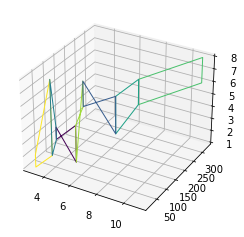

In [45]:
from matplotlib import cm


norm = plt.Normalize(z.min(), z.max())
colors = cm.viridis(norm(z))
rcount, ccount, _ = colors.shape

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
plt.show()

In [ ]:
df.to_csv('CleanedFile.csv',index=False)
